In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, utils, models, callbacks as cb
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [8]:
model: keras.Model = models.load_model(r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2\tuned.h5') 
# plt.style.use('dark_background')

In [9]:
to_bin = lambda y: 0 if (1 - y) > y else 1
batch_size = 32
image_size = (671, 471)

def make_eval_matrix(valpath):
    actual = []
    predictions = []

    valds = tf.keras.preprocessing.image_dataset_from_directory(
        valpath,
        image_size=image_size,
        batch_size=None,
        labels="inferred",
        class_names=["forged", "genuine"],
        label_mode="binary"
    )

    for x, y in valds:
        x = np.expand_dims(x, axis=0)
        p = model(x)
        predictions.append(p.numpy()[0][0])
        actual.append(y.numpy()[0])

     

        
    evaluation = model.evaluate(valds.batch(1), return_dict=True)

    actual = np.array([to_bin(y) for y in actual])
    predictions = np.array([to_bin(y) for y in predictions])

    # matrix = tf.math.confusion_matrix(actual, predictions, num_classes=2)
    cm = ConfusionMatrixDisplay.from_predictions(actual, predictions, display_labels=["forged", "genuine"],cmap=plt.cm.Blues)
    
    try:
        assert np.all(np.equal(actual, predictions))
    except AssertionError:
        # print(f'{valpath=}')
        # print(f'{actual=}')
        # print(f'{predictions=}')
        pass
    finally:
        return cm,evaluation['binary_accuracy']

E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2
Found 180 files belonging to 2 classes.
180/180 [==============================] - 7s 38ms/step - loss: 1.0564 - binary_accuracy: 0.9500 - recall_4: 0.9000 - precision_4: 1.0000
CNN scored 95.00% on E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2



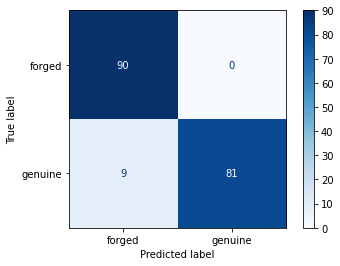

In [10]:
root = os.getcwd()
logroot = os.path.join(root,'datasets','midv-2020-scanned','experiment 2' ,'logs', 'models')
root = os.path.join(root, 'datasets', 'midv-2020-scanned')
# print(logroot)
for doctype in [(r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2')]:
    outpath = os.path.join(r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2','evaluation_matrix_cnn.png')
    valpath = os.path.join(doctype, 'validation')
    print(doctype)
    logpath = os.path.join(logroot, 'cnn.txt')




    cm , eval= make_eval_matrix(valpath)
    cm.figure_.savefig(outpath)
    print(f'CNN scored {eval:.2%} on {doctype}\n')
   


In [11]:
# image_size = (671, 471)
# batch_size = 16

# def make_eval_matrix(val_path, doctype: str):
#     val = tf.keras.preprocessing.image_dataset_from_directory(
#         val_path,
#         image_size=image_size,
#         batch_size=1,
#         labels="inferred",
#         class_names=["forged", "genuine"],
#         label_mode="binary",
#         shuffle=False
#     )
    
#     yytest = []
#     yypred = []

#     for xtest, ytest in val:
#         ypred = model(xtest)

#         yytest.append(ytest[0][0].numpy())
#         yypred.append(ypred[0][0].numpy())

#         # print(f'{ypred[0][0].numpy()=}, {ytest[0][0].numpy()=}')
    
#     evaluation = model.evaluate(val, return_dict=True)
#     print(f'{doctype=}')
#     print(f'{evaluation=}')
#     print(f'{yytest=}')
#     print(f'{yypred=}')
    
#     # yypred = np.array([0 if (1 - y) > y else 1 for y in yytest], dtype=np.int32)
#     result =  confusion_matrix(yytest, yypred)
    
#     return  evaluation

In [12]:
# root = os.getcwd()
# logroot = os.path.join(root, 'logs', 'models')
# root = os.path.join(root, 'datasets', 'midv-2020')

# i = 0 
# for doctype in os.listdir(root):
#     if i < 5: i += 1; continue
#     # macOS places these everywhere, just ignore them.
#     if doctype == '.DS_Store': continue

#     docpath = os.path.join(root, doctype)
#     templatepath = os.path.join(docpath, 'base_template.bmp')
#     outpath = os.path.join(docpath, 'evaluation_matrix.png')
#     valpath = os.path.join(docpath, 'validation')
#     logpath = os.path.join(logroot, 'cnn.txt')
#     print(docpath)
#     try:
#         matrix, evaluation = make_eval_matrix(valpath, doctype)
#         # accuracy = evaluation['binary_accuracy']
#     except Exception as e:
#         print(f'Failed on {doctype}')
#         print(e)
#         pass
